### 6 m is mean nitricline depth and just below 10% light level in base run

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
import NorthNut as nn
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
import matplotlib.patheffects as path_effects
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


In [2]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmask=nn.tmask
umask=nn.umask
vmask=nn.vmask
umask0=nn.umask0
vmask0=nn.vmask0
boxCol=nn.boxCol
colL=nn.colL
colR=nn.colR

In [3]:
k=6 #depth presented here
k1=30 # max depth to do calcs to
start=dt.datetime(2015,5,15) # originally 5/15-8/15,  but changed to even number of fortnights (6, end is included)
end=dt.datetime(2015,8,20)
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/'
mod_basedirND='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/rev_noDisc/'
mod_nam_fmtND='long'
mod_flenND=10
fverND='noDisc'
mod_basedirNM='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/rev_noMrubrum/'
mod_nam_fmtNM='long'
mod_flenNM=10
fverNM='noMrubrum'
mod_basedirHC='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_nam_fmtHC='nowcast'
mod_flenHC=1
fverHC='HC201812Base'

In [4]:
# calc transports: boxes in full model coords
boxes,boxesS=nn.defboxes(k);

volumes: 
(40, 130, 97)
0 vol: 232834007.16923195
0 north face area: 0.017903174399708822
0 floor area: 38.10316762126778
(40, 130, 97)
1 vol: 475501033.2591236
1 north face area: 0.051981996171633744
1 floor area: 76.65649877674242
(40, 130, 97)
2 vol: 467855857.4262955
2 north face area: 0.0660928789851366
2 floor area: 76.13281888160705
(40, 130, 97)
3 vol: 475349561.3011287
3 north face area: 0.0691002936013758
3 floor area: 77.68207812856889
(40, 130, 97)
4 vol: 460253674.3391861
4 north face area: 0.06656271287114815
4 floor area: 76.70622481510526
(40, 130, 97)
5 vol: 468674561.80761874
5 north face area: 0.07171871451380164
5 floor area: 76.99707667445263


In [5]:
with nc.Dataset('/ocean/eolson/MEOPAR/northernNO3PaperCalcs/bioModel/runFiles/bathymetry_201702_noDisc.nc') as bathy:
    bathyND=np.copy(bathy.variables['Bathymetry'][jg0:jg1,ig0:ig1])

In [6]:
bathyND.shape

(130, 97)

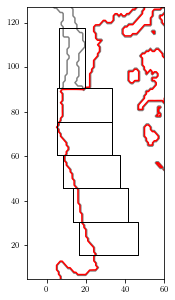

In [7]:
fig,ax=plt.subplots(1,1,figsize=(3,5))
viz_tools.set_aspect(ax)
ax.contour(tmask[0,:,:],[.5],colors='gray')
ax.contour(bathyND,[.5],colors='r')
for el in boxes.keys():
    iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
    ax.plot(iii-ig0,jjj-jg0,'-',color='k',linewidth=1)
    ax.set_xlim(-10,60)
    ax.set_ylim(5,127)

In [8]:
NBoundND, SBoundND, EBoundND, BBoundND, NBoundMixND, SBoundMixND, EBoundMixND, \
    BBoundMixND, timesND, boxesND = nn.calcTranspsReduced(
        start,end,k1,-1,fverND,saveloc,recalc=False)
NBoundNM, SBoundNM, EBoundNM, BBoundNM, NBoundMixNM, SBoundMixNM, EBoundMixNM, \
    BBoundMixNM, timesNM, boxesNM = nn.calcTranspsReduced(
        start,end,k1,-1,fverNM,saveloc,recalc=False)
NBoundHC, SBoundHC, EBoundHC, BBoundHC, NBoundMixHC, SBoundMixHC, EBoundMixHC, \
    BBoundMixHC, timesHC, boxes = nn.calcTranspsReduced(
        start,end,k1,-1,fverHC,saveloc,recalc=False)

In [9]:
NBoundC_ND, SBoundC_ND, EBoundC_ND, BBoundC_ND, NBoundMixC_ND, SBoundMixC_ND, \
    EBoundMixC_ND, BBoundMixC_ND = nn.transpConversions(boxes,NBoundND,SBoundND,
                    EBoundND,BBoundND,NBoundMixND,SBoundMixND,EBoundMixND,BBoundMixND,k)
NBoundC_NM, SBoundC_NM, EBoundC_NM, BBoundC_NM, NBoundMixC_NM, SBoundMixC_NM, \
    EBoundMixC_NM, BBoundMixC_NM = nn.transpConversions(boxes,NBoundNM,SBoundNM,
                    EBoundNM,BBoundNM,NBoundMixNM,SBoundMixNM,EBoundMixNM,BBoundMixNM,k)
NBoundC_HC, SBoundC_HC, EBoundC_HC, BBoundC_HC, NBoundMixC_HC, SBoundMixC_HC, \
    EBoundMixC_HC, BBoundMixC_HC = nn.transpConversions(boxes,NBoundHC,SBoundHC,
                    EBoundHC,BBoundHC,NBoundMixHC,SBoundMixHC,EBoundMixHC,BBoundMixHC,k)

0
0.0 0.0 0.0
0.0 0.0 0.0
1
-0.4378507356838243 -0.020823825716819854 0.06512570768975945
-0.00016273474620069107 0.022444307046106192 -0.0013930213915927228
2
-0.17285061765156096 0.0007372974770856719 0.004586488944110066
-0.00014781253573528923 0.024617743872447344 -0.0005852842197399689
3
-0.16442932552233488 -0.016146534272876364 -0.08552533510189755
-9.418057340255625e-05 0.027761020011738944 -0.0009963149756297232
4
-0.24955878026699027 -0.029879503516051033 -0.061318447143376933
-9.919765242672008e-05 0.04911502585374354 -0.001447528327751936
5
-0.33046414049733536 -0.0675644683727893 -0.08280307241568174
-6.600497569146892e-05 0.06869844288436652 -0.000840958684698951
0
0.6489060135907044 -3.586590339447517 0.0
-0.00033997590017075896 5.295093204821447 0.0
1
-2.1808435845456238 0.3556162648153051 -0.3557467085651339
-0.0004074124316225826 2.607604602426981 0.001185208201772732
2
-4.6051677481364175 -3.9140649601255886 -0.5331062263433125
0.0019178636380949798 1.023785820569781

In [10]:
IPPND,INPPND=nn.calcProd(start,end,fverND,saveloc,recalc=False)
IPPNM,INPPNM=nn.calcProd(start,end,fverNM,saveloc,recalc=False)
IPPHC,INPPHC=nn.calcProd(start,end,fverHC,saveloc,recalc=False)

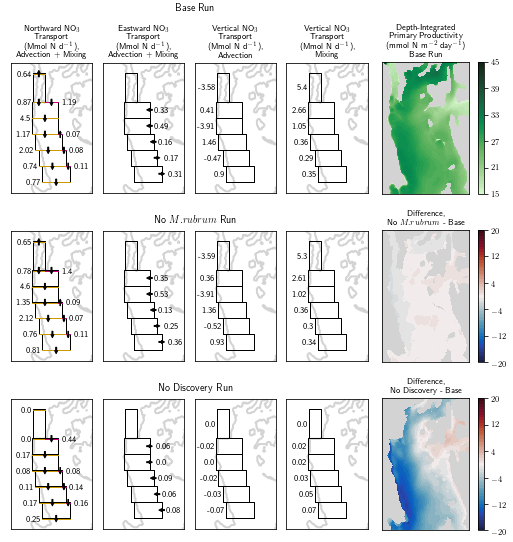

In [11]:
fig=plt.figure(figsize=(7,7.5))
gs0=gridspec.GridSpec(3,5,hspace=0.27,wspace=.12,left=.01,right=.95,bottom=.022,top=.89,
                     width_ratios=[1,1,1,1,1.3])
jx=0
ax0=list()
for ix in range(0,4):
    ax0.append(fig.add_subplot(gs0[jx,ix]))
    viz_tools.set_aspect(ax0[ix])
    ax0[ix].contour(tmask[0,:,:],[.5],colors='lightgray',linewidths=2)
    ax0[ix].set_xlim(-17,70)
    ax0[ix].set_ylim(5,127)
    ax0[ix].get_xaxis().set_visible(False)
    ax0[ix].get_yaxis().set_visible(False)
    for el in boxes.keys():
        iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
        ax0[ix].plot(iii-ig0,jjj-jg0,'-',color='k',linewidth=1)
# (Mmol N d$^{-1}$)
ax0[0].set_title('Northward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotYTranspUpper(ax0[0],boxes,NBoundC_HC,SBoundC_HC,NBoundMixC_HC,SBoundMixC_HC,2)
ax0[1].set_title('Eastward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotXTranspUpper(ax0[1],boxes,EBoundC_HC,EBoundMixC_HC,2)
ax0[2].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection')
nn.annotWTTranspUpper(ax0[2],boxes,BBoundC_HC,2)
ax0[3].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nMixing')
nn.annotWMTranspUpper(ax0[3],boxes,BBoundMixC_HC,2)
ax0[0].annotate('Base Run',(.38,.98),xycoords='figure fraction',ha='center');

jx=1
ax1=list()
for ix in range(0,4):
    ax1.append(fig.add_subplot(gs0[jx,ix]))
    viz_tools.set_aspect(ax1[ix])
    ax1[ix].contour(tmask[0,:,:],[.5],colors='lightgray',linewidths=2)
    ax1[ix].set_xlim(-17,70)
    ax1[ix].set_ylim(5,127)
    ax1[ix].get_xaxis().set_visible(False)
    ax1[ix].get_yaxis().set_visible(False)
    for el in boxes.keys():
        iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
        ax1[ix].plot(iii-ig0,jjj-jg0,'-',color='k',linewidth=1)
# (Mmol N d$^{-1}$)
#ax1[0].set_title('Northward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotYTranspUpper(ax1[0],boxes,NBoundC_NM,SBoundC_NM,NBoundMixC_NM,SBoundMixC_NM,2)
#ax1[1].set_title('Eastward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotXTranspUpper(ax1[1],boxes,EBoundC_NM,EBoundMixC_NM,2)
#ax1[2].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection')
nn.annotWTTranspUpper(ax1[2],boxes,BBoundC_NM,2)
#ax1[3].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nMixing')
nn.annotWMTranspUpper(ax1[3],boxes,BBoundMixC_NM,2)
ax1[0].annotate('No $M. rubrum$ Run',(.38,.59),xycoords='figure fraction',ha='center');

jx=2
ax2=list()
for ix in range(0,4):
    ax2.append(fig.add_subplot(gs0[jx,ix]))
    viz_tools.set_aspect(ax2[ix])
    ax2[ix].contour(bathyND,[.5],colors='lightgray',linewidths=2)
    ax2[ix].set_xlim(-17,70)
    ax2[ix].set_ylim(5,127)
    ax2[ix].get_xaxis().set_visible(False)
    ax2[ix].get_yaxis().set_visible(False)
    for el in boxes.keys():
        iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
        ax2[ix].plot(iii-ig0,jjj-jg0,'-',color='k',linewidth=1)
# (Mmol N d$^{-1}$)
#ax2[0].set_title('Northward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotYTranspUpper(ax2[0],boxes,NBoundC_ND,SBoundC_ND,NBoundMixC_ND,SBoundMixC_ND,2)
#ax2[1].set_title('Eastward NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection + Mixing')
nn.annotXTranspUpper(ax2[1],boxes,EBoundC_ND,EBoundMixC_ND,2)
#ax2[2].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nAdvection')
nn.annotWTTranspUpper(ax2[2],boxes,BBoundC_ND,2)
#ax2[3].set_title('Vertical NO$_3$\nTransport\n(Mmol N d$^{-1}$),\nMixing')
nn.annotWMTranspUpper(ax2[3],boxes,BBoundMixC_ND,2)
ax2[0].annotate('No Discovery Run',(.38,.28),xycoords='figure fraction',ha='center');

# prod plots
axP=list()
gsP=list()
axcb=list()
bgcol='lightgray'
for jx in range(0,3):
    gsP.append(gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[jx,4],
                                         width_ratios=[15,1],wspace=.1))
    axP.append(fig.add_subplot(gsP[jx][0]))
    axcb.append(fig.add_subplot(gsP[jx][1]))
    viz_tools.set_aspect(axP[jx])
    axP[jx].get_xaxis().set_visible(False)
    axP[jx].get_yaxis().set_visible(False)
    axP[jx].set_facecolor(bgcol)
clim=(15,45)
cmP=cmocean.cm.algae
m0=axP[0].contourf(np.ma.masked_where(tmask[0,...]==0,np.mean(IPPHC,0)*24*3600),np.linspace(clim[0],clim[1],50),
                   vmin=clim[0],vmax=clim[1],cmap=cmP)
cb=fig.colorbar(m0,cax=axcb[0],ticks=np.linspace(clim[0],clim[1],6))
for c in m0.collections:
    c.set_edgecolor("face")
axP[0].set_title('Depth-Integrated\nPrimary Productivity\n(mmol N m$^{-2}$ day$^{-1}$)\nBase Run')
cmD=cmocean.cm.balance
clim1=(-20,20)
m1=axP[1].contourf(np.ma.masked_where(tmask[0,...]==0,(np.mean(IPPNM,0)-np.mean(IPPHC,0))*24*3600),
                   np.linspace(clim1[0],clim1[1],50),
                   vmin=clim1[0],vmax=clim1[1],cmap=cmD)
cb=fig.colorbar(m1,cax=axcb[1],ticks=np.linspace(clim1[0],clim1[1],6))
axP[1].set_title('Difference,\nNo $M. rubrum$ - Base')


m2=axP[2].contourf(np.ma.masked_where(bathyND==0,(np.mean(IPPND,0)-np.mean(IPPHC,0))*24*3600),
                   np.linspace(clim1[0],clim1[1],50),
                   vmin=clim1[0],vmax=clim1[1],cmap=cmD)
cb=fig.colorbar(m2,cax=axcb[2],ticks=np.linspace(clim1[0],clim1[1],6))
axP[2].set_title('Difference,\nNo Discovery - Base')

fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/response/testRunComp.eps',dpi = 200)

Calculations

In [12]:
bmask=np.where(bathyND==0,0,1)

In [13]:
sumHCIPP=np.sum(tmask[0,:,:]*np.mean(IPPHC,0))
sumHCIPPD=np.sum(bmask*np.mean(IPPHC,0))
sumNMIPP=np.sum(tmask[0,:,:]*np.mean(IPPNM,0))
sumNDIPP=np.sum(bmask*np.mean(IPPND,0))

In [14]:
sumHCINPP=np.sum(tmask[0,:,:]*np.mean(INPPHC,0))
sumHCINPPD=np.sum(bmask*np.mean(INPPHC,0))
sumNMINPP=np.sum(tmask[0,:,:]*np.mean(INPPNM,0))
sumNDINPP=np.sum(bmask*np.mean(INPPND,0))

In [15]:
print('percent Difference in Integrated PP, No M Rub to base:',(sumNMIPP-sumHCIPP)/sumHCIPP*100)
print('percent Difference in Integrated PP, No Discovery to base:',(sumNDIPP-sumHCIPPD)/sumHCIPPD*100)

percent Difference in Integrated PP, No M Rub to base: -0.7335676875958547
percent Difference in Integrated PP, No Discovery to base: -21.51887389681648


In [16]:
print('percent Difference in Integrated New PP, No M Rub to base:',(sumNMINPP-sumHCINPP)/sumHCINPP*100)
print('percent Difference in Integrated New PP, No Discovery to base:',(sumNDINPP-sumHCINPPD)/sumHCINPPD*100)

percent Difference in Integrated New PP, No M Rub to base: -1.1921948798486097
percent Difference in Integrated New PP, No Discovery to base: -34.893810871873484


In [17]:
ig0=105
ig1=370
jg0=200
jg1=800
with nc.Dataset('/ocean/eolson/MEOPAR/northernNO3PaperCalcs/bioModel/runFiles/bathymetry_201702_noDisc.nc') as bathy:
    bathyND=np.copy(bathy.variables['Bathymetry'][jg0:jg1,ig0:ig1])

In [18]:
pathND='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/IPP_LD_noDisc_20150515-20150820.pkl'
pathHC='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/IPP_LD_HC201812Base_20150515-20150820.pkl'
data=pickle.load(open(pathND,'rb'))
print(len(data['IPP']))
IPPND=np.mean(data['IPP'],0)
del data
data=pickle.load(open(pathHC,'rb'))
print(len(data['IPP']))
IPPHC=np.mean(data['IPP'],0)
del data

2352
2352


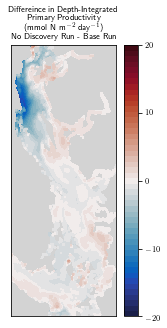

In [19]:
fig,ax=plt.subplots(1,1,figsize=(3,5))
viz_tools.set_aspect(ax)
ax.set_facecolor(bgcol)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
m=ax.contourf(np.ma.masked_where(bathyND==0,(IPPND-IPPHC)*24*3600),
                   np.linspace(clim1[0],clim1[1],50),
                   vmin=-20,vmax=20,cmap=cmD)
for c in m.collections:
    c.set_edgecolor("face")
fig.colorbar(m,ticks=[-20,-10,0,10,20])
ax.set_title('Differeince in Depth-Integrated\nPrimary Productivity\n(mmol N m$^{-2}$ day$^{-1}$)\nNo Discovery Run - Base Run')
fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/response/PPCompLarge.pdf',dpi=200)